# Integrate People with Theme 1
Demo to show how to join people (housing unit allocation point data) with Theme 1 - Air, Water, and Climate data.

Examples will include:
1. Geotiff
2. NetCDF
3. Shapefile

## Description of Program
- program:    aqe_2av1_CKANjoin_2025-10-30
- task:       Read files from CKAN - Join HUA with File
- Version:    2025-10-30
- project:    Southeast Texas Urban Integrated Field Lab
- funding:	  DOE
- author:     Nathanael Rosenheim

## Step 0: Good Housekeeping

In [1]:
# 1. Import all packages
import pandas as pd     # For obtaining and cleaning tabular data
import geopandas as gpd # For obtaining and cleaning spatial data
import matplotlib.pyplot as plt # For plotting
import contextily as ctx # For adding basemaps
import os # For saving output to path

In [2]:
# 2. Check versions
import sys
print("Python Version     ", sys.version)
print("geopandas version: ", gpd.__version__)

Python Version      3.10.14 | packaged by Anaconda, Inc. | (main, May  6 2024, 19:44:50) [MSC v.1916 64 bit (AMD64)]
geopandas version:  0.14.2


In [3]:
# 3. Check working directory
# Get information on current working directory (getcwd)
os.getcwd()

'c:\\Users\\nathanael99\\Box\\SETx-UIFL_Team-folder\\Theme_3_eq\\Text\\AirQuality_Equity\\WorkNPR'

In [4]:
#4. Store Program Name for output files to have the same name
programname = "aqe_2av1_CKANjoin_2025-10-30"
# Make directory to save output
#if not os.path.exists(programname):
#    os.mkdir(programname)

In [5]:
# Functions to explore the housing unit allocation results
# load functions from Github repository
ncoda_00d_cleanvarsutils_url = "https://github.com/npr99/intersect-community-data/raw/main/pyncoda/ncoda_00d_cleanvarsutils.py"
ncoda_04c_poptableresults_url = "https://github.com/npr99/intersect-community-data/raw/main/pyncoda/ncoda_04c_poptableresults.py"

import requests
import importlib.util

# Load the clean vars utils functions
response1 = requests.get(ncoda_00d_cleanvarsutils_url)
exec(response1.text)

# Load the pop table results functions - skip first 5 lines
response2 = requests.get(ncoda_04c_poptableresults_url)
# Split into lines, skip first 5, then rejoin
lines = response2.text.split('\n')
code_to_exec = '\n'.join(lines[5:])
exec(code_to_exec)

print("Successfully loaded functions from both GitHub repositories")

Successfully loaded functions from both GitHub repositories


# Step 1: Obtain Data

In [6]:
# housing unit allocation data from CKAN
data_title = "2020 Housing Unit Allocation for SETX"
url = "https://ckan.tacc.utexas.edu/dataset/62308724-7eac-45ed-aeab-d4d6a46128e1/resource/5154eb5e-d8ff-4183-b361-fd530513e3c1/download/hua_v2-0-0_setxuifl_tx_nsi_2020_nsi_rs9876.csv"

hua_df = pd.read_csv(url)
hua_df.head()

,huid,Block2020,blockid,bgid,tractid,FIPScounty,numprec,ownershp,race,hispan,...,strctid_Block2020_flagsetrm,addrptid,fd_id_bid,huestimate,huicounter_addpt,placeNAME20,x,y,occtype,geometry
0,B481990302002008H002,481990302002008,4.819903e+14,4.819903e+11,4.819903e+10,48199.0,0.0,NaN,NaN,NaN,...,2.0,ST00nsi-481325235-86274HQQ+WH4-8-3-8-4AP000000,nsi-481325235-86274HQQ+WH4-8-3-8-4,0.0,1.0,Sour Lake,-94.411062,30.139761,COM1,POINT (-94.411062 30.139761)
1,B481990302002008H001,481990302002008,4.819903e+14,4.819903e+11,4.819903e+10,48199.0,0.0,NaN,NaN,NaN,...,2.0,ST00nsi-481325996-86274HQQ+XP2-3-2-3-1AP000000,nsi-481325996-86274HQQ+XP2-3-2-3-1,0.0,1.0,Sour Lake,-94.410730,30.139890,COM4,POINT (-94.41073 30.13989)
2,NaN,999999999999999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,nsi-481326655-86274HQQ+JQ2-3-2-4-2,NaN,NaN,NaN,NaN,NaN,RES1-1SNB,POINT (-94.410605 30.139004)
3,NaN,999999999999999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,nsi-481326679-86274HQQ+JPC-3-2-3-2,NaN,NaN,NaN,NaN,NaN,RES1-1SNB,POINT (-94.41072800000001 30.139059)
4,NaN,999999999999999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,nsi-481326680-86274HRV+25G-4-3-1-2,NaN,NaN,NaN,NaN,NaN,COM4,POINT (-94.407042 30.140074)


In [7]:
# task force sites
data_title = "Task Force Top Two Focus Sites"
url = "https://ckan.tacc.utexas.edu/dataset/cfe91d1b-3aa9-4de1-ba76-2837deb87649/resource/7e2e3d0e-60cc-4fb1-beea-d30a62cdd1e9/download/task_force_sites_top_focus_may_2024.zip"

tfsites_gdf = gpd.read_file(url)
tfsites_gdf.head()

,Shape_Leng,Shape_Area,Site_Name,geometry
0,0.0,0.0,West Port Arthur - Foley Watershed,"POLYGON Z ((-10458830.588 3488032.728 0.000, -..."
1,0.0,0.0,Southeast Beaumont - Hillebrant Bayou/Tenmile ...,"POLYGON Z ((-10476419.371 3513315.472 0.000, -..."


In [8]:
tfsites_gdf.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

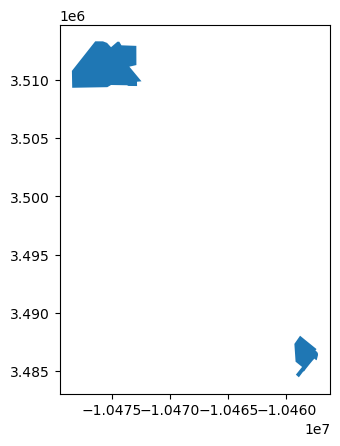

In [9]:
tfsites_gdf.plot()

# Step 2: Clean Data

In [10]:
# convert hua_df to a GeoDataFrame
# use geometry column
hua_gdf = gpd.GeoDataFrame(hua_df, geometry=gpd.GeoSeries.from_wkt(hua_df['geometry']), crs="EPSG:4326")
hua_gdf.head()

,huid,Block2020,blockid,bgid,tractid,FIPScounty,numprec,ownershp,race,hispan,...,strctid_Block2020_flagsetrm,addrptid,fd_id_bid,huestimate,huicounter_addpt,placeNAME20,x,y,occtype,geometry
0,B481990302002008H002,481990302002008,4.819903e+14,4.819903e+11,4.819903e+10,48199.0,0.0,NaN,NaN,NaN,...,2.0,ST00nsi-481325235-86274HQQ+WH4-8-3-8-4AP000000,nsi-481325235-86274HQQ+WH4-8-3-8-4,0.0,1.0,Sour Lake,-94.411062,30.139761,COM1,POINT (-94.41106 30.13976)
1,B481990302002008H001,481990302002008,4.819903e+14,4.819903e+11,4.819903e+10,48199.0,0.0,NaN,NaN,NaN,...,2.0,ST00nsi-481325996-86274HQQ+XP2-3-2-3-1AP000000,nsi-481325996-86274HQQ+XP2-3-2-3-1,0.0,1.0,Sour Lake,-94.410730,30.139890,COM4,POINT (-94.41073 30.13989)
2,NaN,999999999999999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,nsi-481326655-86274HQQ+JQ2-3-2-4-2,NaN,NaN,NaN,NaN,NaN,RES1-1SNB,POINT (-94.41061 30.13900)
3,NaN,999999999999999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,nsi-481326679-86274HQQ+JPC-3-2-3-2,NaN,NaN,NaN,NaN,NaN,RES1-1SNB,POINT (-94.41073 30.13906)
4,NaN,999999999999999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,nsi-481326680-86274HRV+25G-4-3-1-2,NaN,NaN,NaN,NaN,NaN,COM4,POINT (-94.40704 30.14007)


<Axes: >

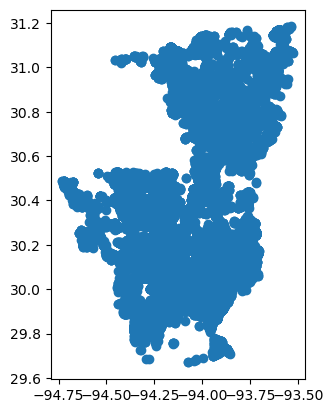

In [11]:
hua_gdf.plot()

<Axes: >

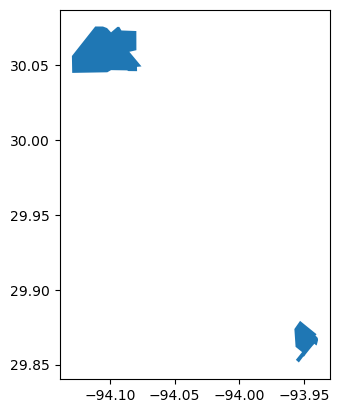

In [12]:
# convert task force site CRS to match hua_gdf
tfsites_gdf = tfsites_gdf.to_crs(hua_gdf.crs)
tfsites_gdf.plot()

In [13]:
# add site id to task force gdf
tfsites_gdf['Site_ID'] = tfsites_gdf.index + 1
tfsites_gdf = tfsites_gdf[['Site_ID','Site_Name', 'geometry']]
tfsites_gdf.head()

,Site_ID,Site_Name,geometry
0,1,West Port Arthur - Foley Watershed,"POLYGON Z ((-93.95327 29.87921 0.00000, -93.94..."
1,2,Southeast Beaumont - Hillebrant Bayou/Tenmile ...,"POLYGON Z ((-94.11128 30.07594 0.00000, -94.10..."


### Spatial Join
Add Task Force Site ID to HUA

In [14]:
# spatial join hua_gdf with tfsites_gdf
hua_tfsites_gdf = gpd.sjoin(hua_gdf, tfsites_gdf, how="left", op="intersects")
hua_tfsites_gdf.head()

c:\Users\nathanael99\AppData\Local\miniconda3\envs\pyncoda20240619\lib\site-packages\IPython\core\interactiveshell.py:3517: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


,huid,Block2020,blockid,bgid,tractid,FIPScounty,numprec,ownershp,race,hispan,...,huestimate,huicounter_addpt,placeNAME20,x,y,occtype,geometry,index_right,Site_ID,Site_Name
0,B481990302002008H002,481990302002008,4.819903e+14,4.819903e+11,4.819903e+10,48199.0,0.0,NaN,NaN,NaN,...,0.0,1.0,Sour Lake,-94.411062,30.139761,COM1,POINT (-94.41106 30.13976),NaN,NaN,NaN
1,B481990302002008H001,481990302002008,4.819903e+14,4.819903e+11,4.819903e+10,48199.0,0.0,NaN,NaN,NaN,...,0.0,1.0,Sour Lake,-94.410730,30.139890,COM4,POINT (-94.41073 30.13989),NaN,NaN,NaN
2,NaN,999999999999999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,RES1-1SNB,POINT (-94.41061 30.13900),NaN,NaN,NaN
3,NaN,999999999999999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,RES1-1SNB,POINT (-94.41073 30.13906),NaN,NaN,NaN
4,NaN,999999999999999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,COM4,POINT (-94.40704 30.14007),NaN,NaN,NaN


# Step 3: Explore Data

In [15]:
# describe results by Site_ID
hua_tfsites_gdf.groupby('Site_ID').size()

Site_ID
1.0    1223
2.0    8443
dtype: int64

<Axes: >

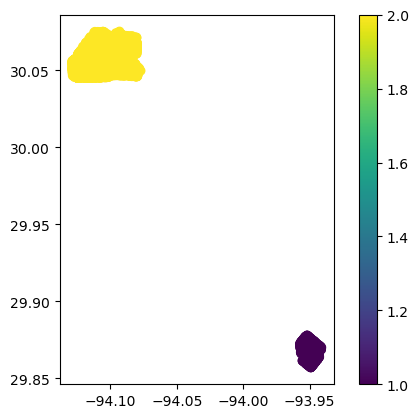

In [16]:
# plot points by Site_ID
hua_tfsites_gdf.plot(column='Site_ID', legend=True)

In [17]:
PopResultsTable.pop_results_table(
                  input_df = hua_tfsites_gdf, 
                  who = "Total Population by Households", 
                  what = "by Race, Ethnicity",
                  where = 'Southeast Texas',
                  when = '2020',
                  row_index = "Race Ethnicity",
                  col_index = 'Tenure Status')

Tenure Status,1 Owner Occupied (%),2 Renter Occupied (%),Total Population by Households (%)
Race Ethnicity,,,
"1 White alone, Not Hispanic","190,993 (64.4%)","48,649 (37.8%)","239,642 (56.4%)"
"2 Black alone, Not Hispanic","45,982 (15.5%)","50,382 (39.2%)","96,364 (22.7%)"
"3 American Indian and Alaska Native alone, Not Hispanic",883 (0.3%),435 (0.3%),"1,318 (0.3%)"
"4 Asian alone, Not Hispanic","7,896 (2.7%)","3,199 (2.5%)","11,095 (2.6%)"
"5 Other Race, Not Hispanic","7,800 (2.6%)","3,666 (2.9%)","11,466 (2.7%)"
"6 Any Race, Hispanic","42,897 (14.5%)","22,260 (17.3%)","65,157 (15.3%)"
Total,"296,451 (100.0%)","128,591 (100.0%)","425,042 (100.0%)"


In [18]:
# look just at site 1
site1_hua_gdf = hua_tfsites_gdf[hua_tfsites_gdf['Site_ID'] == 1]
PopResultsTable.pop_results_table(
                  input_df = site1_hua_gdf, 
                  who = "Total Population by Households", 
                  what = "by Race, Ethnicity",
                  where = 'Site 1 - West Port Arthur',
                  when = '2020',
                  row_index = "Race Ethnicity",
                  col_index = 'Tenure Status')

Tenure Status,1 Owner Occupied (%),2 Renter Occupied (%),Total Population by Households (%)
Race Ethnicity,,,
"1 White alone, Not Hispanic",64 (7.2%),47 (4.4%),111 (5.7%)
"2 Black alone, Not Hispanic",678 (76.0%),908 (85.5%),"1,586 (81.2%)"
"3 American Indian and Alaska Native alone, Not Hispanic",1 (0.1%),2 (0.2%),3 (0.2%)
"4 Asian alone, Not Hispanic",14 (1.6%),11 (1.0%),25 (1.3%)
"5 Other Race, Not Hispanic",33 (3.7%),16 (1.5%),49 (2.5%)
"6 Any Race, Hispanic",102 (11.4%),78 (7.3%),180 (9.2%)
Total,892 (100.0%),"1,062 (100.0%)","1,954 (100.0%)"


In [19]:
# look just at site 2
site2_hua_gdf = hua_tfsites_gdf[hua_tfsites_gdf['Site_ID'] == 2]
PopResultsTable.pop_results_table(
                  input_df = site2_hua_gdf, 
                  who = "Total Population by Households", 
                  what = "by Race, Ethnicity",
                  where = 'Site 2 - Southeast Beaumont',
                  when = '2020',
                  row_index = "Race Ethnicity",
                  col_index = 'Tenure Status')

Tenure Status,1 Owner Occupied (%),2 Renter Occupied (%),Total Population by Households (%)
Race Ethnicity,,,
"1 White alone, Not Hispanic",392 (4.4%),515 (7.3%),907 (5.7%)
"2 Black alone, Not Hispanic","5,003 (56.0%)","4,733 (66.7%)","9,736 (60.8%)"
"3 American Indian and Alaska Native alone, Not Hispanic",6 (0.1%),11 (0.2%),17 (0.1%)
"4 Asian alone, Not Hispanic",218 (2.4%),93 (1.3%),311 (1.9%)
"5 Other Race, Not Hispanic",175 (2.0%),155 (2.2%),330 (2.1%)
"6 Any Race, Hispanic","3,135 (35.1%)","1,585 (22.3%)","4,720 (29.5%)"
Total,"8,929 (100.0%)","7,092 (100.0%)","16,021 (100.0%)"


In [20]:
site1_hua_gdf = PopResultsTable.add_race_ethnicity_to_pop_df(site1_hua_gdf)
site2_hua_gdf = PopResultsTable.add_race_ethnicity_to_pop_df(site2_hua_gdf)

c:\Users\nathanael99\AppData\Local\miniconda3\envs\pyncoda20240619\lib\site-packages\geopandas\geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
c:\Users\nathanael99\AppData\Local\miniconda3\envs\pyncoda20240619\lib\site-packages\geopandas\geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
c:\Users\nathanael99\AppData\Local\miniconda3\envs\pyncoda20240619\lib\site-packages\geopandas\geodataframe.py:1543: Setti

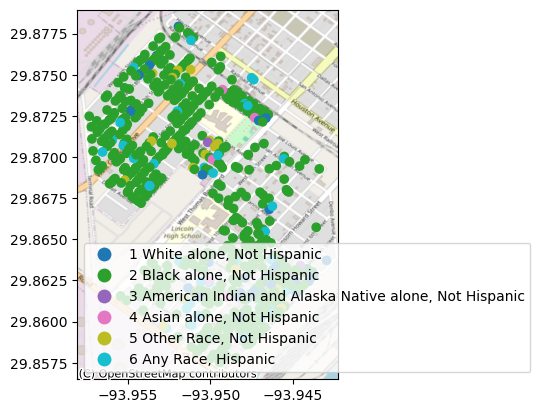

In [21]:
# select points for site ID 1
ax = site1_hua_gdf.plot(column='Race Ethnicity', 
        legend=True)

ctx.add_basemap(ax, crs=site1_hua_gdf.crs, 
        source=ctx.providers.OpenStreetMap.Mapnik)

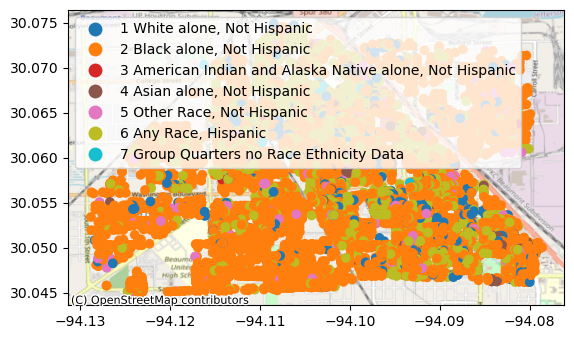

In [22]:
# select points for site ID 2
ax = site2_hua_gdf.plot(column='Race Ethnicity', 
        legend=True)

ctx.add_basemap(ax, crs=site2_hua_gdf.crs, 
        source=ctx.providers.OpenStreetMap.Mapnik)

# Output files

In [23]:
# Save Work at this point as CSV
savefile = programname+"_site1.csv"
site1_hua_gdf.to_csv(savefile, index=False)

In [24]:
# Save Work at this point as CSV
savefile = programname+"_site2.csv"
site2_hua_gdf.to_csv(savefile, index=False)